Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.3295 - loss: 1.2407 - val_accuracy: 0.2917 - val_loss: 1.2141
Epoch 2/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3795 - loss: 1.1586 - val_accuracy: 0.2917 - val_loss: 1.1775
Epoch 3/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2667 - loss: 1.1495 - val_accuracy: 0.2917 - val_loss: 1.1408
Epoch 4/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2812 - loss: 1.1079 - val_accuracy: 0.2917 - val_loss: 1.1058
Epoch 5/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3106 - loss: 1.0646 - val_accuracy: 0.2917 - val_loss: 1.0735
Epoch 6/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3769 - loss: 0.9994 - val_accuracy: 0.3750 - val_loss: 1.0446
Epoch 7/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4737 - loss: 0.9679 - val_accuracy: 0.5000 - val_loss: 1.0158
Epoch 8/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7168 - loss: 0.9332 - val_accuracy: 0.5000 - val_loss: 0.

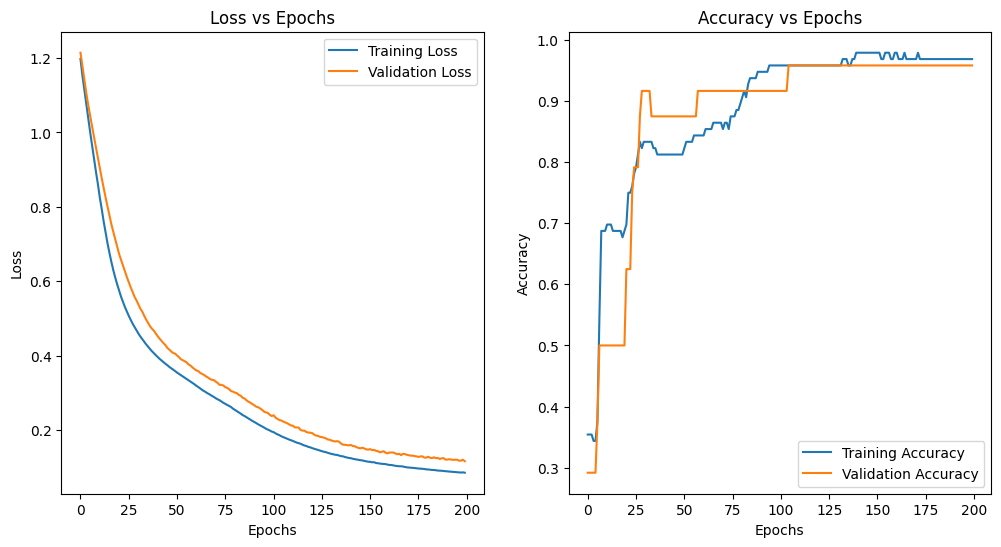

In [ ]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Labels

# Standardize the features (important for neural networks)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# One-hot encode the target labels
y = tf.keras.utils.to_categorical(y, 3)

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the Neural Network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_dim=4),  # 10 neurons in the hidden layer
    tf.keras.layers.Dense(3, activation='softmax')  # Output layer with 3 neurons (for 3 classes)
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=8, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test_classes, y_pred_classes)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Plotting the training loss and accuracy
plt.figure(figsize=(12, 6))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


Explanation of Code:
Data Loading & Preprocessing:

Load the Iris dataset: We use load_iris from sklearn.datasets to load the dataset. It contains 150 samples with 4 features and 3 class labels.
Standardization: Features are standardized using StandardScaler to have a mean of 0 and standard deviation of 1. This is important for neural networks.
One-hot Encoding: The target labels are one-hot encoded (converting them into binary format for each class) using tf.keras.utils.to_categorical.
Building the Model:

Input Layer: The model has an input layer with 4 features (since there are 4 features in the Iris dataset).
Hidden Layer: We add a hidden layer with 10 neurons and ReLU activation. This is where UAT is applicable. With this hidden layer, the neural network can approximate complex patterns, like mapping features to species labels.
Output Layer: The output layer has 3 neurons (since there are 3 classes in the Iris dataset) with softmax activation, which is used for multi-class classification.
Model Compilation:

We use the Adam optimizer and categorical cross-entropy loss (since we are dealing with a multi-class classification problem).
The accuracy metric is used to track the model's performance during training.
Training:

The model is trained for 200 epochs with a batch size of 8 and a validation split of 20%. The training process will display the loss and accuracy for both training and validation sets.
Evaluation:

After training, the model is evaluated on the test data, and we calculate the accuracy of the predictions by comparing the predicted class labels with the true class labels.
Plotting:

We plot the loss and accuracy curves over the epochs for both the training and validation sets. This helps to visualize how well the model is learning over time.
What You Can Learn from This Code:
Universal Approximation Theorem in Action:
Even with a simple neural network (1 hidden layer, 10 neurons), the network is able to approximate the complex mapping between the Iris dataset features and species. You can experiment with adding more hidden layers or increasing the number of neurons to further improve the model's performance.

Model Performance:
The neural network learns to classify the Iris species by minimizing the loss function over the epochs. You can track how the model improves over time and how well it generalizes to unseen data (test set).